## Modelo ARIMA

La especificación matemática del modelo ARIMA(1,1,1) utilizado en este caso es la siguiente:

Primero, se define la serie de tiempo estacionaria diferenciando la serie original una vez. Esta serie diferenciada se denota como $Y'$.

Luego, se modela $Y'$ como la suma de un componente autoregresivo de orden 1 (AR(1)), un componente de media móvil de orden 1 (MA(1)), y un término de error $\varepsilon_t$. Matemáticamente, esto se escribe como:

$$Y't = \phi Y'{t-1} + \theta \varepsilon_{t-1} + \varepsilon_t$$

donde $\phi$ es el parámetro del componente autoregresivo, $\theta$ es el parámetro del componente de media móvil, $\varepsilon_{t-1}$ es el término de error en el periodo anterior, y $\varepsilon_t$ es el término de error en el periodo actual.

Finalmente, se obtiene la serie pronosticada tomando la suma acumulada de las diferencias $Y'$ entre cada par de periodos consecutivos, y sumándole el valor inicial de la serie original. Matemáticamente, esto se escribe como:

$$Y_t = Y_0 + \sum_{i=1}^t Y'_i$$

donde $Y_t$ es el valor pronosticado para el periodo $t$, $Y_0$ es el valor inicial de la serie original, $Y'_i$ es la diferencia $Y'$ entre los periodos $i$ e $i-1$, y la suma se extiende desde $i=1$ hasta $i=t$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

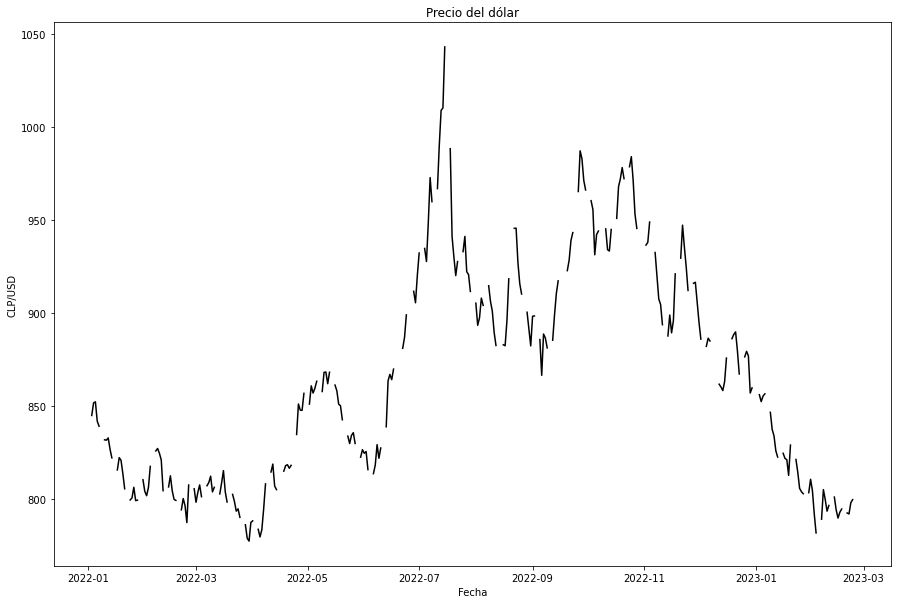

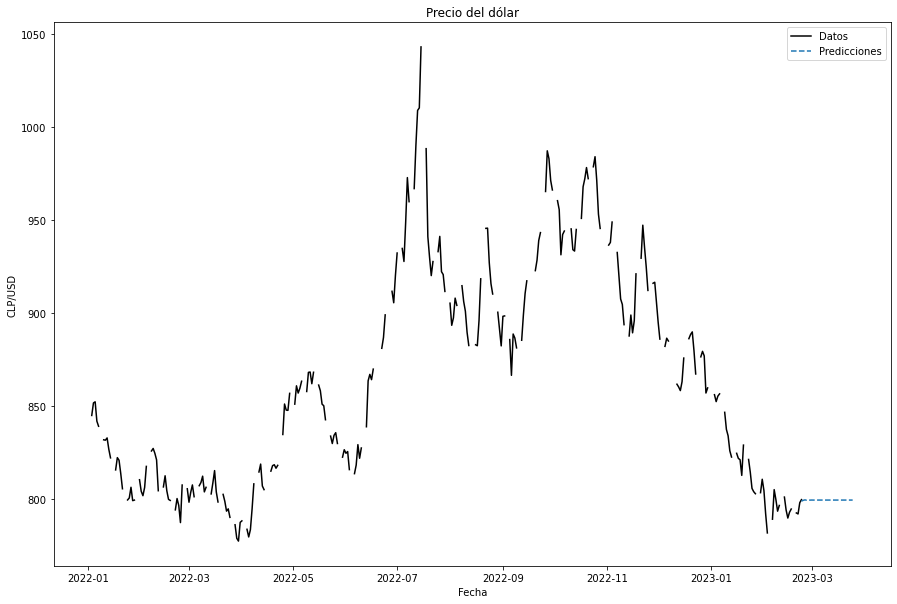

2023-02-23    798.581758
2023-02-24    799.013832
2023-02-25    799.269830
2023-02-26    799.108480
2023-02-27    799.210175
2023-02-28    799.146079
2023-03-01    799.186478
2023-03-02    799.161016
2023-03-03    799.177064
2023-03-04    799.166949
2023-03-05    799.173324
2023-03-06    799.169306
2023-03-07    799.171838
2023-03-08    799.170242
2023-03-09    799.171248
2023-03-10    799.170614
2023-03-11    799.171014
2023-03-12    799.170762
2023-03-13    799.170921
2023-03-14    799.170821
2023-03-15    799.170884
2023-03-16    799.170844
2023-03-17    799.170869
2023-03-18    799.170853
2023-03-19    799.170863
2023-03-20    799.170857
2023-03-21    799.170861
2023-03-22    799.170858
2023-03-23    799.170860
2023-03-24    799.170859
2023-03-25    799.170860
Freq: D, Name: predicted_mean, dtype: float64

In [2]:
# Cargar los datos del BCCh
url = 'https://github.com/Nicoadriazola/USD_CLP/raw/main/dolar.xlsx'
try:
    data = pd.read_excel(url, engine='openpyxl')
except ValueError:
    data = pd.read_excel(url, engine='xlrd')

# Seleccionar la columna de fecha y el precio del dólar
data = data[['Fecha', 'Dólar observado']].rename(columns={'Fecha': 'fecha', 'FX': 'dolar'})

# Convertir la columna de fecha a un objeto datetime y establecerla como el índice
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')
data = data.set_index('fecha')

# Visualizar los datos
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ax.plot(data, color='k')
ax.set_title('Precio del dólar')
ax.set_xlabel('Fecha')
ax.set_ylabel('CLP/USD')
plt.show()

# Estimar el modelo ARIMA
model = ARIMA(data, order=(1, 1, 1)).fit()

# Obtener las predicciones para los próximos 30 días
end_date = data.index[-1] + pd.DateOffset(days=30)
predictions = model.predict(start=data.index[-1], end=end_date, typ='levels')

# Visualizar las predicciones
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ax.plot(data, color='k')
ax.plot(predictions, linestyle='--')
ax.set_title('Precio del dólar')
ax.set_xlabel('Fecha')
ax.set_ylabel('CLP/USD')
ax.legend(['Datos', 'Predicciones'])
plt.show()

predictions